<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
['PG-13' 'TV-MA' 'TV-MA' ... 'R' 'PG' 'TV-14']
                              title date_added  year  month
0              Dick Johnson Is Dead 2021-09-25  2021      9
1                     Blood & Water 2021-09-24  2021      9
2                        

C:\Users\HRISHITA\AppData\Local\Temp\ipykernel_4784\1846379912.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rating'].fillna(method= 'ffill', inplace=True)
C:\Users\HRISHITA\AppData\Local\Temp\ipykernel_4784\1846379912.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['duration'].fillna(method= 'ffill', inplace=True)


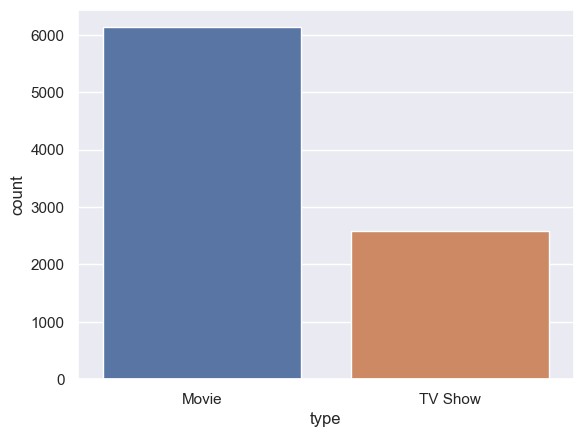

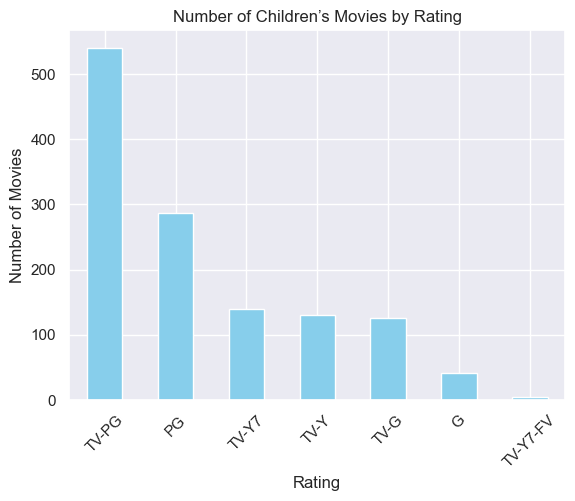

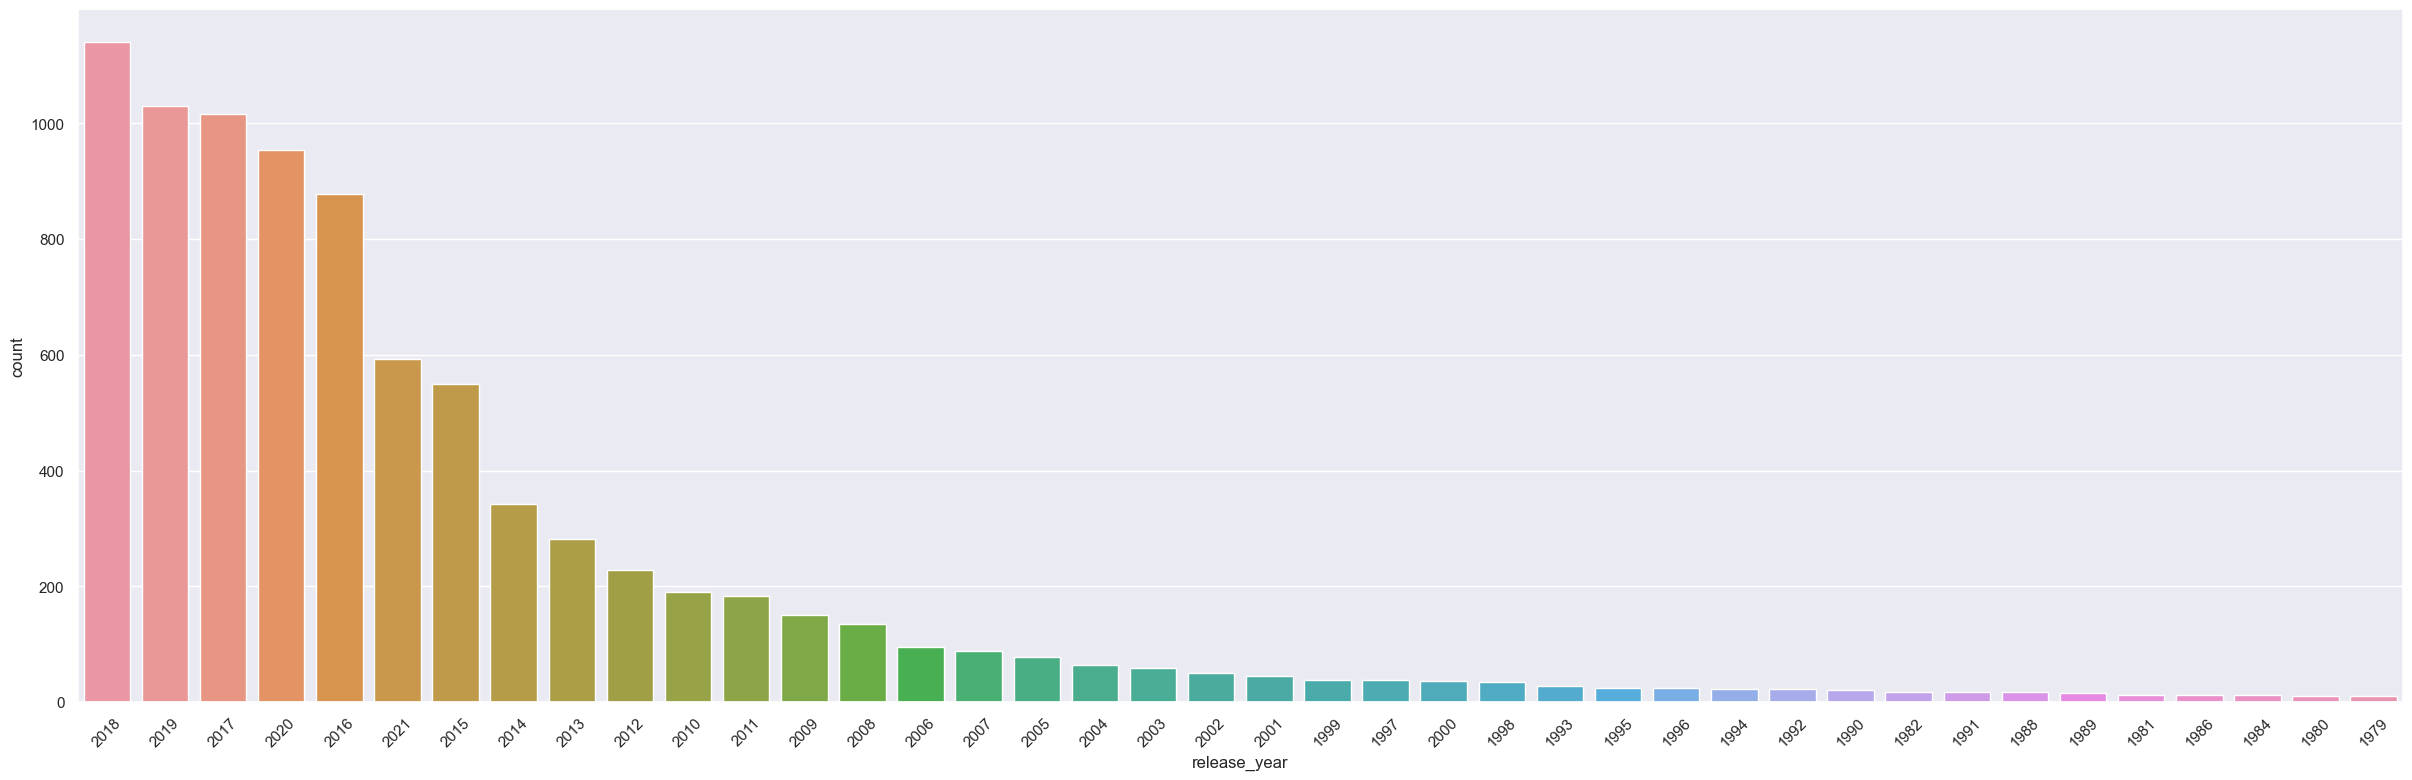

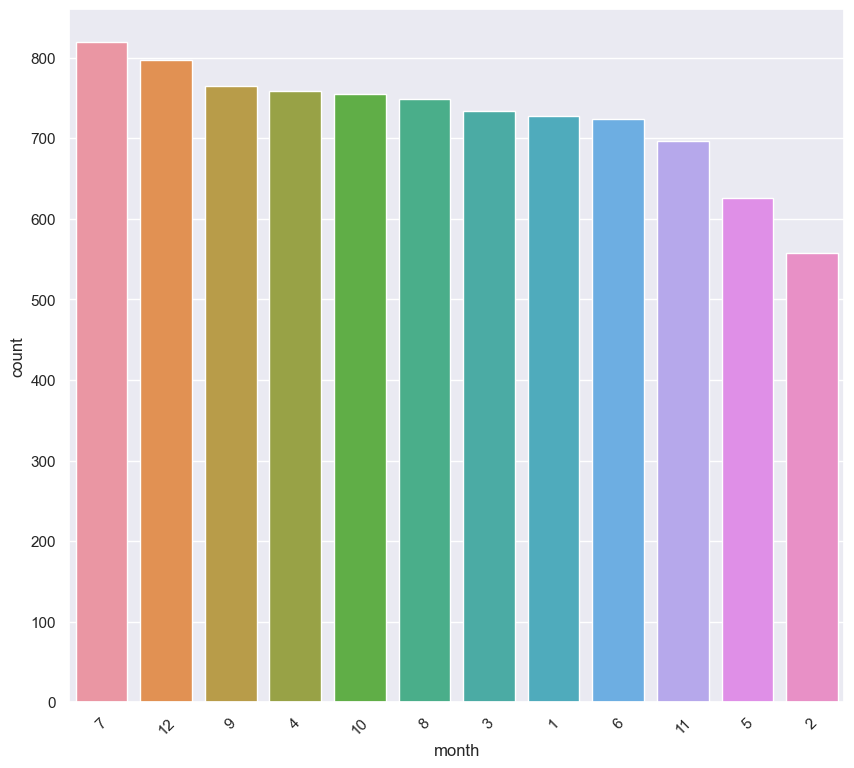

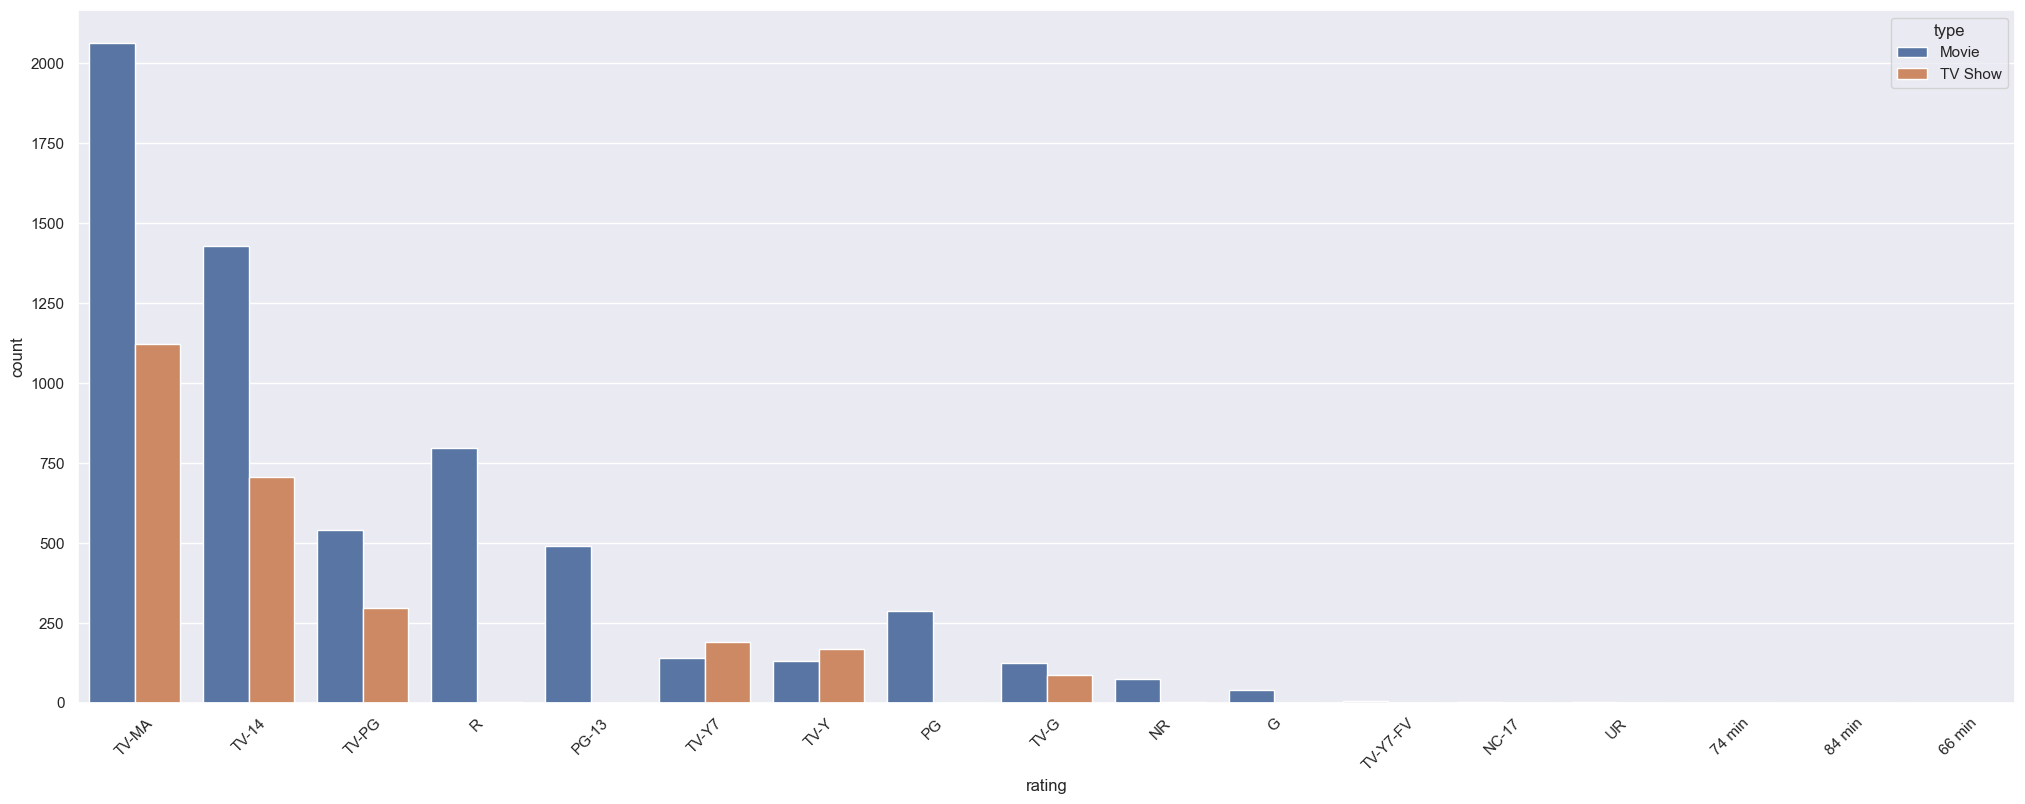

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
df.head()

df.info()

df.isnull().sum()

df.drop(['director','cast'], axis=1, inplace= True)
df.head()

df['country'].value_counts()

df['country'].fillna("Unknown", inplace= True)
#df['director'].fillna('Unknown', inplace=True)
#df['cast'].fillna('Unknown', inplace=True)

df['date_added'].value_counts()

df['rating'].fillna(method= 'ffill', inplace=True)
df['duration'].fillna(method= 'ffill', inplace=True)

df.isnull().sum()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df = df[df['date_added'].notna()]

df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df.head()

print(df['rating'].values)

df.isnull().sum()

print(df[['title', 'date_added', 'year', 'month']].head(10))
df.isnull().sum()

sns.set()
sns.countplot(x= 'type', data=df)
plt.show()

child_ratings = ['G', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-Y7-FV', 'PG', 'TV-PG']

child_movies = df[(df['type'] == 'Movie') & (df['rating'].isin(child_ratings))]

rating_counts = child_movies['rating'].value_counts()

rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Children’s Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

sns.set()
plt.figure(figsize= (30,9))
sns.countplot(x= 'release_year', data= df, order = df['release_year'].value_counts().index[0:40])
plt.xticks(rotation=45)
plt.show()

sns.set()
plt.figure(figsize= (10,9))
sns.countplot(x= 'month', data= df, order= df['month'].value_counts().index[0:40])
plt.xticks(rotation= 45)
plt.show()

sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= df,hue= "type",order = df['rating'].value_counts().index[0:20])
plt.xticks(rotation=45)
plt.show()